Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = \mathbb{cosh}(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}
$$
and you can generalize this system for n springs

In [45]:
using Plots, FFTW
spring_n = 3
spring_ms = [1,3,3]
spring_ks = [1, 1, 1]

A = zeros(spring_n,spring_n)

for i ∈ 1:spring_n
    for j ∈ 1:spring_n
        if i == 1 && j == 1
            A[i,j] = -(spring_ks[1])/spring_ms[1]
        
        elseif i == j
            A[i,j] = -spring_ks[j]/spring_ms[j-1] -(spring_ks[j])/spring_ms[j]

        elseif i == j-1
            A[i,j] = (spring_ks[j])/spring_ms[i]
        
        elseif i == j+1
            A[i,j] = (spring_ks[j])/spring_ms[j]
        
        end
    end
end
print(A)

t = range(0, 100, length=1000)

initial = [-1,0,1]

x = [cosh(i * sqrt(A)) * initial for i ∈ t]

x_vals = [[real(i[j]) for i ∈ x] for j ∈ 1:spring_n]


[-1.0 1.0 0.0; 1.0 -1.3333333333333333 0.3333333333333333; 0.0 0.3333333333333333 -0.6666666666666666]

3-element Vector{Vector{Float64}}:
 [-1.0, -0.9949969526160624, -0.9800711989655305, -0.9554712368343784, -0.9216057059042067, -0.8790352271997526, -0.8284612242841098, -0.7707119656738167, -0.7067261272474912, -0.6375342261628932  …  0.23537218110461527, 0.2749074008095639, 0.3078074648671349, 0.33407514699063445, 0.3538503037478897, 0.36740243358468794, 0.37512046359009177, 0.37750002035443997, 0.37512849621159283, 0.368668269978081]
 [0.0, -0.003333043049661385, -0.013248823973833434, -0.029499206237752623, -0.05167694661407518, -0.07922502282718574, -0.1114493979658783, -0.14753493526326344, -0.18656410608550633, -0.22753807117711206  …  -0.4141587532820558, -0.38846251957706657, -0.35524829156389026, -0.3149608081945878, -0.26820445412311406, -0.21573115130483028, -0.15842493913335395, -0.09728357725251674, -0.03339757165553828, 0.03207291768966833]
 [1.0, 0.9966609201944223, 0.9866548705024989, 0.9700156230900655, 0.9468001338252421, 0.9170895188647401, 0.8809903689664561, 0.8386

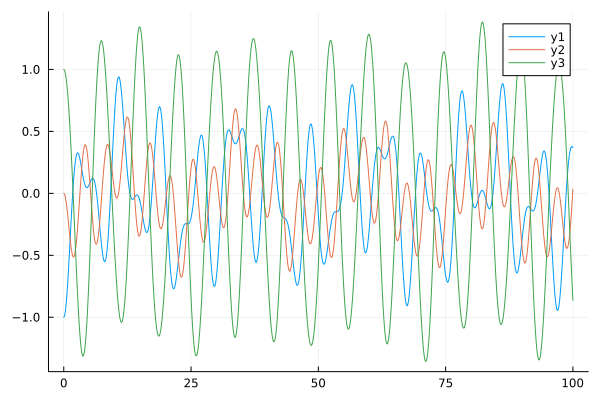

In [57]:
plot(t, [x_vals])

In [ ]:
fft_x = [fft(i) for i ∈ x]

print(fft_x)

mag_fft_x = [[abs(i) for i in fft_x[j]] for j ∈ spring_n]



arg_fft_x1 = [[angle(i) for i in fft_x[j]] for j ∈ spring_n]



#plot(t, [mag_fft_x1 ./ 1200, mag_fft_x2 ./ 1200, arg_fft_x1, arg_fft_x2])
plot(t, [mag_fft_x[1]])

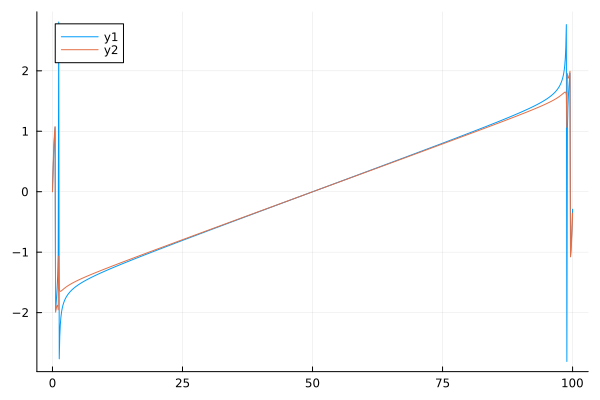

In [20]:
plot(t, [arg_fft_x1, arg_fft_x2])